# Machine Learning Programming Exercise 7: Principle Component Analysis 

In [1]:
#import package(s)
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio 
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## 2 Principal Component Analysis
This exercise uses principal component analysis (PCA) to perform dimensionality reduction. Experimenting with an example 2D dataset will provide an intuition on how PCA works. Then it will be used on a bigger dataset of $5000$ face image dataset.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    
   What PCA does is try to find a line or a plane to project the data onto to minimize the squared orthogonal (90 degrees) projection error. In the image below, projecting the data to the red line will result in smaller projection errors (shorter blue line segments) then projecting them to the magenta line. The projection error is the distance between the data point the projection of that point. 
   
  Image source: Image from Andrew Ng's Machine Learning course on Coursera used for illustration.
  ![PCAprob.png](PCAprob.png)
   
    
   Uses for PCA:
    
   1. Data Compression: compress the data using dimensionality reduction to use up less computer memory or disk space and to speed up learning algorithms.

2. Visualization: understand the data better by reducing the dimensions to visualize it and develop effective learning algorithms.

A bad use of PCA is to use it to prevent overfitting. Use regularization instead. 
</div>

### 2.1 Example Dataset
To understand how PCA works, first start with a 2D dataset which has one direction of large variation and one of smaller variation. In this part of the exercise, visualize what happens when PCA reduces the data from 2D to 1D. In practice, you might want to reduce data from $256$ to $50$ dimensions. Using lower dimensional data in this example allows us to visualize the algorithms better.

Visualizing example dataset for PCA.


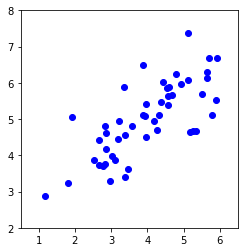

In [2]:
# ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easily to
#  visualize

print('Visualizing example dataset for PCA.')

#The following command loads the dataset. You should now have the 
#variable X in your environment
data = sio.loadmat('ex7data1.mat')
X = data['X']

#Visualize the example dataset
plt.figure()
plt.plot(X[:,0], X[:,1], 'bo')
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 2.2 Implementing PCA
PCA consists of two computational steps: First, compute the covariance matrix of the data. Then, use the SVD function to compute the eigenvectors $U_1 , U_2 , \dots, U_n$. These will correspond to the principal components of variation in the data.

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

After normalizing the data, run PCA to compute the principal components. First, compute the covariance matrix of the data, which is given by: $\begin{align*} \Sigma = \frac{1}{m} X^T X \end{align*}$
where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator.

After computing the covariance matrix, run SVD on it to compute the principal components. In Python, you can run SVD with the following command: U, S, V = numpy.linalg.svd(Sigma), where $U$ will contain the principal components and $S$ will contain a diagonal matrix.

Run PCA on the example dataset and plot the corresponding principal components found. The script will also output the top principal component (eigenvector) found, of about $[-0.707, -0.707]$. (It is possible that the output might be the negative of this, since $U_1$ and $-U_1$ are equally valid choices for the first principal component.)

<div class="alert alert-block alert-info">
<b>Note:</b> 
   When designing a machine learning system, try training the learning algorithm on the original data first without using PCA. Only if there is a reason to believe that using the original data won't work (the learning algorithm ends up running too slowly, the memory or the disk space requirement is too large, etc.), then use PCA and the compressed representation of the data. 

</div>

Running PCA on example dataset.


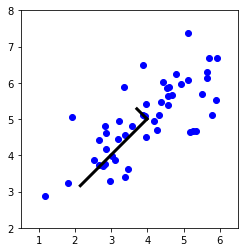

Top eigenvector: 
 U[:,0] = -0.707107 -0.707107
(you should expect to see -0.707107 -0.707107)


In [3]:
#define function for exercise(s)
def featureNormalize(X):
#FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.
    
    #compute the mean of each column
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    #compute the standard deviation of each column
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma
    return X_norm, mu, sigma

def PCA(X):
#PCA Run principal component analysis on the dataset X
#   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
#   Returns the eigenvectors U, the eigenvalues (on diagonal) in S
    
    #compute the nxn covariance matrix, where n = # of features
    X_cov = np.dot(X.T,X)/float(len(X))
    #use the "svd" function to compute the eigenvectors and 
    #eigenvalues of the covariance matrix. 
    U, S, Vh = np.linalg.svd(X_cov, full_matrices=True)
    return U, S 

def drawLine(p1, p2, **kwargs):
#DRAWLINE Draws a line from point p1 to point p2
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
#   current figure
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]], **kwargs)

# =============== Part 2: Principal Component Analysis ===============
#  You should now implement PCA, a dimension reduction technique. You
#  should complete the code in pca.m

print('Running PCA on example dataset.')

#Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = PCA(X_norm)

#Draw the eigenvectors centered at mean of data. These lines show the
#directions of maximum variations in the dataset.
plt.figure()
plt.plot(X[:,0], X[:,1], 'bo')
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box')
drawLine(mu, mu + 1.5 *S[0] * U[:,0], linewidth=3.0, color = 'black', linestyle ='-')
drawLine(mu, mu + 1.5 *S[1] * U[:,1], linewidth=3.0, color = 'black', linestyle ='-')
plt.show()

print('Top eigenvector: ')
print(' U[:,0] = %f %f' % (U[0,0], U[0,1]))
print('(you should expect to see -0.707107 -0.707107)')

THe image above shows the computed eigenvectors of the dataset.

### 2.3 Dimensionality Reduction with PCA
After computing the principal components, use them to reduce the feature dimension of the dataset by projecting each example onto a lower dimensional space, $x^{(i)} \to z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space. 

In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

#### 2.3.1 Projecting the data onto the principal components
A dataset $X$, the principal components $U$, and the desired number of dimensions to reduce to $K$ are given. Project each example in $X$ onto the top $K$ components in $U.$ Note that the top $K$ components in $U$ are given by the first $K$ columns of $U$, that is $U_{reduce} = U(:, 1:K).$

Project the first example onto the first dimension to see a value of about $1.481$ (or possibly $-1.481$, if you got $-U_1$ instead of $U_1$). 

#### 2.3.2 Reconstructing an approximation of the data
After projecting the data onto the lower dimensional space, the data can approximately be recovered by projecting them back onto the original high dimensional space. Project each example in $Z$ back onto the original space and return the recovered approximation in $X_{rec}$.

Recovering an approximation of the first example to see a value of about $[-1.047, -1.047].$

#### 2.3.3 Visualizing the projections
The code performs both the projection and approximate reconstruction to show how the projection affects the data. The original data points are indicated with the blue circles, while the projected data points are indicated with the red circles. The projection eﬀectively only retains the information in the direction given by $U_1.$

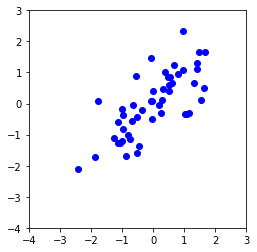

Projection of the first example: 1.496313
(this value should be about 1.481274)
Approximation of the first example: -1.058053 -1.058053

(this value should be about -1.047419 -1.047419)


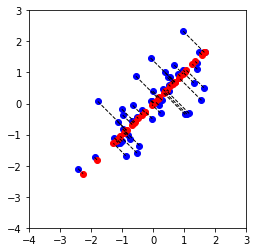

In [4]:
#define function for exercise(s)
def projectData(X, U, K):
#PROJECTDATA Computes the reduced data representation when projecting only 
#on to the top k eigenvectors
#   Z = projectData(X, U, K) computes the projection of 
#   the normalized inputs X into the reduced dimensional space spanned by
#   the first K columns of U. It returns the projected examples in Z.
 
    #Compute the projection of the data using only the top K 
    #eigenvectors in U (first K columns) 
    z = np.dot(X, U[:,0:K])
    return z
    
def recoverData(Z, U, K):
#RECOVERDATA Recovers an approximation of the original data when using the 
#projected data
#   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
#   original data that has been reduced to K dimensions. It returns the
#   approximate reconstruction in X_rec.
    
    X_rec = np.dot(Z, (U[:,0:K]).T)
    return X_rec

# =================== Part 3: Dimension Reduction ===================
#  You should now implement the projection step to map the data onto the 
#  first k eigenvectors. The code will then plot the data in this reduced 
#  dimensional space.  This will show you what the data looks like when 
#  using only the corresponding eigenvectors to reconstruct it.
#  You should complete the code in projectData.m 

#Plot the normalized dataset (returned from pca)
plt.figure()
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.axis([-4, 3, -4, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: %f' % Z[0])
print('(this value should be about 1.481274)')

X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: %f %f\n' % (X_rec[0, 0], X_rec[0, 1]))
print('(this value should be about -1.047419 -1.047419)')

#Draw lines connecting the projected points to the original points
plt.figure()
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.axis([-4, 3, -4, 3])
plt.plot(X_rec[:,0], X_rec[:,1], 'ro')
plt.gca().set_aspect('equal', adjustable='box')
for i in range(len(X_rec)):
    drawLine(X_norm[i,:], X_rec[i,:], linewidth=1.0, color = 'black', linestyle ='--')
plt.show()

The bottom figure shows the normalized and projected data after PCA.

### 2.4 Face Image Dataset

In this part of the exercise, run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset $X$ of face images, each $32\times32$ in grayscale. Each row of $X$ corresponds to one face image (a row vector of length $1024$). The next step is to load and visualize the first $100$ of these face images.

This dataset was based on a [cropped version](http://conradsanderson.id.au/lfwcrop/) of the [labeled faces in the wild](http://vis-www.cs.umass.edu/lfw/) dataset.

Loading face dataset.



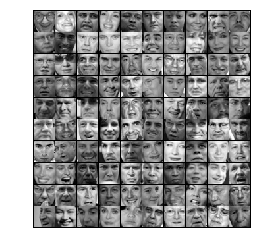

In [5]:
#define function for exercise(s)
def displayData(X):
#DISPLAYDATA Display 2D data in a nice grid
    example_width = int(round(math.sqrt(X.shape[1])))

    # Compute rows, cols
    m,n = X.shape
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))

    # Between images padding
    pad = 1

    # Setup blank display
    row_initial = pad + display_rows*(example_height + pad)
    col_initial = pad + display_cols*(example_width + pad)
    display_array = -(np.ones((row_initial, col_initial)))

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j  in range(display_rows):
        for i in range(display_cols):
            if curr_ex > m:
                break 
            # Copy the patch
            
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex, :]))
            
            row_arr = list(map(lambda x:x+pad+j*(example_height + pad), range(example_height+1)))
            col_arr = list(map(lambda x:x+pad+i*(example_width + pad), range(example_width+1)))
            display_array[row_arr[0]:row_arr[-1], col_arr[0]:col_arr[-1]] = np.reshape(X[curr_ex, :], (example_height, example_width)) / max_val
            curr_ex = curr_ex + 1
            
        if curr_ex > m:
            break
    # Display Image
    h = plt.imshow(display_array.T, clim = (-1,1))
    # gray scale the image
    h.set_cmap('gray')
    # Do not show axis
    plt.axis('off')
    plt.show()

# =============== Part 4: Loading and Visualizing Face Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  The following code will load the dataset into your environment

print('Loading face dataset.\n')

#Load Face dataset
data = sio.loadmat('ex7faces.mat')
X = data['X']

#Display the first 100 faces in the dataset
displayData(X[0:100,:])

#### 2.4.1 PCA on Faces
To run PCA on the face dataset, first normalize the dataset by subtracting the mean of each feature from the data matrix $X.$ After running PCA, the principal components of the dataset are obtained. Notice that each principal component in $U$ (each row) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that these principal components can be visualized by reshaping each of them into a $32\times32$ matrix that corresponds to the pixels in the original dataset. The code displays the first $36$ principal components that describe the largest variations, but this could be changed to display more principal components to see how they capture more and more details.

<div class="alert alert-block alert-info">
<b>Note:</b> 
   Though the number of principal components $K$ where chosen for this exercise, there are procedures where $K$ can be calculated to find where 99/% of the variance is retained. This gives people a good intuitive sense of whether your implementation of PCA is finding a good approximation of the original data set.

</div>

Running PCA on face dataset.
(this might take a minute or two ...)


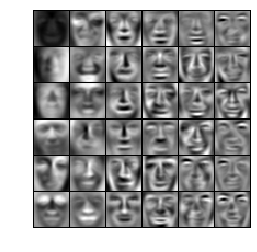

In [6]:
# =========== Part 5: PCA on Face Data: Eigenfaces  ===================
#  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#  We display the first 36 eigenfaces.

print('Running PCA on face dataset.')
print('(this might take a minute or two ...)')

#Before running PCA, it is important to first normalize X by subtracting 
#the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#Run PCA
U, S = PCA(X_norm)

#Visualize the top 36 eigenvectors found
displayData((U[:, 0:36]).T)

The image above shows the principal components on the face dataset.

#### 2.4.2 Dimensionality Reduction
Once the principal components are computed for the face dataset, use it to reduce the dimension of the face dataset. This allows the learning algorithm to use a smaller input size (e.g., $100$ dimensions) instead of the original $1024$ dimensions. This can help speed up the learning algorithm.

Project the face dataset onto only the first $100$ principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}.$

To understand what is lost in the dimension reduction, recover the data using only the projected dataset. An approximate recovery of the data is performed and the original and projected face images are displayed. From the reconstruction, observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than $10\times$) in the dataset size that can help speed up the learning algorithm significantly. For example, if you were training a neural network to perform person recognition (gven a face image, predict the identitfy of the person), you can use the dimension reduced input of only a $100$ dimensions instead of the original pixels.

In [7]:
# ============= Part 6: Dimension Reduction for Faces =================
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 

print('Dimension reduction for face dataset.')

K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a size of: ', len(Z))

Dimension reduction for face dataset.
The projected data Z has a size of:  5000


Visualizing the projected (reduced dimension) faces.


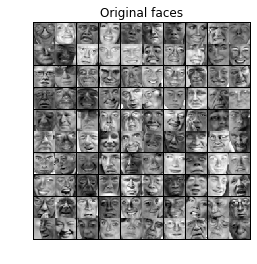

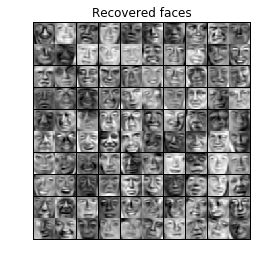

In [8]:
# ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed

print('Visualizing the projected (reduced dimension) faces.')

K = 100
X_rec  = recoverData(Z, U, K)

#Display the normalized data
plt.title('Original faces')
displayData(X_norm[0:100,:])

#Display reconstructed data from only k eigenfaces
plt.title('Recovered faces')
displayData(X_rec[0:100,:])

Above are the original images of faces and ones reconstructed from only the top 100 principal components.

### 2.5 Optional (ungraded) exercise: PCA for visualization

In the earlier $K$-means image compression exercise, the $K$-means algorithm is used in the 3-dimensional RGB space. The code to visualize the final pixel assignments in this 3D space is provided. Each data point is colored according to the cluster it has been assigned to.

It turns out that visualizing datasets in 3 dimensions or greater can be cumbersome. Therefore, it is often desirable to only display the data in 2D even at the cost of losing some information. In practice, PCA is often used to reduce the dimensionality of data for visualization purposes. The code applies the implementation of PCA to the 3-dimensional data to reduce it to 2 dimensions and visualize the result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects the view that maximizes the spread of the data, which often corresponds to the "best" view.

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

K-Means iteration 10/10...



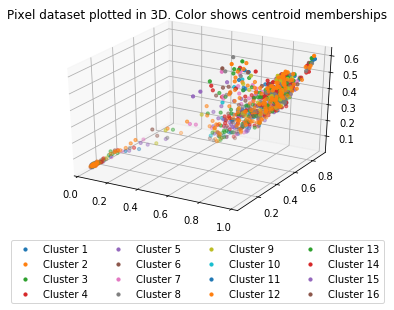

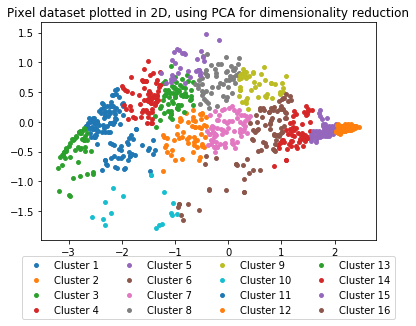

In [9]:
#define function for exercise(s)
def kMeansInitCentroids(X, K):
#KMEANSINITCENTROIDS This function initializes K centroids that are to be 
#used in K-Means on the dataset X
#   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
#   used with the K-Means on the dataset X

    #Initialize the centroids to be random examples
    #Randomly reorder the indices of examples
    randidx = np.random.permutation(range(X.shape[0]))
    #Take the first K examples as centroids
    centroids = X[randidx[0:K]]
    
    return centroids

def findClosestCentroids(X, centroids):
#FINDCLOSESTCENTROIDS computes the centroid memberships for every example
#   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
#   in idx for a dataset X where each row is a single example. idx = m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])

#Set K
    K = centroids.shape[0]

#You need to return the following variables correctly.
    m = X.shape[0]
    idx = np.zeros((m, 1))
    
    for i in range(m):
        c = np.zeros((K, 1))
        for j in range(K):
            dist = np.linalg.norm(X[i]-centroids[j])
            c[j]=dist
        idx[i] = np.argmin(c)+1

    return idx

def computeCentroids(X, idx, K):
#COMPUTECENTROIDS returns the new centroids by computing the means of the 
#data points assigned to each centroid.
#   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
#   computing the means of the data points assigned to each centroid. It is
#   given a dataset X where each row is a single data point, a vector
#   idx of centroid assignments (i.e. each entry in range [1..K]) for each
#   example, and K, the number of centroids. You should return a matrix
#   centroids, where each row of centroids is the mean of the data points
#   assigned to it.

    #Useful variables
    m,n = X.shape
    
    #You need to return the following variables correctly.
    centroids = np.zeros((K, n))
    
    for i in range(1,K+1):
        centroids[i-1,:] = np.mean(X[np.where(idx==i)[0],:],axis=0)
    
    return centroids

def runkMeans(X, initial_centroids, max_iters, plot_progress):
#RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
#is a single example
#   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
#   plot_progress) runs the K-Means algorithm on data matrix X, where each 
#   row of X is a single example. It uses initial_centroids used as the
#   initial centroids. max_iters specifies the total number of interactions 
#   of K-Means to execute. plot_progress is a true/false flag that 
#   indicates if the function should also plot its progress as the 
#   learning happens. This is set to false by default. runkMeans returns 
#   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])

    #Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    #Run K-Means
    for i in range(1,max_iters+1):
        
        #Output progress
        print('K-Means iteration %d/%d...\n' % (i, max_iters))

        #For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        
        #Optionally, plot progress here
        if plot_progress == True:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            plt.show()
            input("Press enter to continue")
        
        #Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
    
    return centroids, idx

def plotDataPoints(X, idx, K):
#PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
#index assignments in idx have the same color
#   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
#   with the same index assignments in idx have the same color
    
    #Plot the data
    plt.figure()
    for i in range(1,K+1):
        #label cluster
        clus_lab = "Cluster " + str(i)
        #scatter plot
        plt.scatter((X[np.where(idx == i)[0],:])[:,0], (X[np.where(idx == i)[0],:])[:,1], 
                    s=15, label=clus_lab)
        
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

# === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
#  One useful application of PCA is to use it to visualize high-dimensional
#  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
#  pixel colors of an image. We first visualize this output in 3D, and then
#  apply PCA to obtain a visualization in 2D.

# Reload the image from the previous exercise and run K-Means on it
# For this to work, you need to complete the K-Means assignment first

img_data = sio.loadmat('bird_small.mat')
A = img_data['A'] 
A = A / float(255) #Divide by 255 so that all values are in the range 0 - 1
X = A.reshape((A.shape[0] * A.shape[1], A.shape[2]))
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters, False)

# Sample 1000 random indexes (since working with all the data is
# too expensive. If you have a fast computer, you may increase this.
sel = np.random.choice(X.shape[0], 1000)

#Visualize the data and centroid memberships in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(1,K+1):
    #label cluster
    clus_lab = "Cluster " + str(i)
    #scatter plot
    ax.scatter((X[np.where(idx[sel] == i)[0],:])[:,0], (X[np.where(idx[sel] == i)[0],:])[:,1],
               (X[np.where(idx[sel] == i)[0],:])[:,2],
                s=10, label=clus_lab)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

# === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
# Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
X_norm, mu, sigma = featureNormalize(X)

# PCA and project the data to 2D
U, S = PCA(X_norm)
Z = projectData(X_norm, U, 2)

# Plot in 2D
plotDataPoints(Z[sel, :], idx[sel], K)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()